## Исследование данных о российском кинопрокате



### Шаг 1. Открываем файлы с данными и объединяем их в один датафрейм. 

Объединяем данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

**Добавим новые функции для работы**

In [1]:
#функция для создания и заполнения столбца данными, которые выделим из передаваемого столбца, данные берутся до первой запятой

def to_data(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].str.split(',').str[0]
    return data

In [2]:
#функция сортировки и определения процентного соотношения указанных категорий в данных

def to_sort(new_df, index, column):
    try:
        to_sort_df = (
            new_df.pivot_table(index=index, values=column, aggfunc='count')
            .sort_values(by=column, ascending = False)
        )
        to_sort_df['percent'] = (to_sort_df[column] / to_sort_df[column].sum()) * 100  
        to_sort_df = to_sort_df.set_axis(['Количество в ' + column, 'Процент от общего'], axis='columns')
        return to_sort_df
    except:
        return 'Ошибка'

**Начнем работу с датасетом**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd.set_option('display.max_columns', None) #установим опцию по выводу всех колонок датафрейма

#укажем формат отображения больших чисел,
pd.set_option('display.float_format', '{:.2f}'.format) #чтобы не применялась экспоненциальная запись в таблицах

In [5]:
data = pd.read_csv('./mkrf_movies.csv', sep=',')
data_dop = pd.read_csv('./mkrf_shows.csv', sep=',')

**Посмотрим первые и последние 5 строк таблиц с данными, общую информацию**

In [6]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
data.tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
data_dop.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [10]:
data_dop.tail()

,puNumber,box_office
3153,224014814,1530.00
3154,224021411,9270.00
3155,224022410,400.00
3156,224023210,360.00
3157,224026410,400.00


In [11]:
data_dop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Проверим столбец, по которому будем объединять, на наличие посторонних строк, символов и прочего**

In [12]:
data[data['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Попробуем преобразовать значения в число. Если не получится, значение в ячейке будет заменено на NaN, а затем удалим строку со значением NaN.

In [13]:
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce')
result = data.loc[pd.isnull(data['puNumber'])]

In [14]:
data = data.dropna(subset=['puNumber'])
data['puNumber'] = data['puNumber'].astype('int')

**Объединим таблицы**

In [15]:
data = data.merge(data_dop, on='puNumber', how='outer')
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [16]:
#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Вывод**\
В таблице представлены данные за 2010-2019 годы. Общее количество записей составляет:
- для файла с прокатными данными о фильмах 7486 (файл mkrf_movies), 
- для файла с данными о сборах 3158 (файл mkrf_shows)

По описанию данных можно заметить некорректные значения:
- Типы данных не соответствуют предполагаемым в столбцах 'puNumber', 'show_start_date', 'ratings'
- Значительные пропуски в данных
    - 'film_studio' — отсутствует 0.24% данных
    - 'production_country' — отсутствует 0.03% данных
    - 'director' — отсутствует 0.12% данных
    - 'producer' — отсутствует 7.59% данных
    - 'refundable_support', 'nonrefundable_support', 'budget', 'financing source' — отсутствует 95.57% данных
    - 'ratings' — отсутствует 12.92% данных
    - 'genres' — отсутствует 13.04% данных
    - 'box office' — отсутствует 57.64% данных
    
Для дальнейшей работы мы объединили таблицы по общему столбцу 'puNumber', в котором содержатся уникальные номера прокатных удостоверений фильмов. Результатом объединения стал датафрейм, в который вошли все объекты как из датасета mkrf_movies, так и из mkrf_shows. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Преобразуем типы там, где это необходимо.

Приведем столбец 'show_start_date' к формату даты

In [18]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

Проверим столбец 'ratings'

In [19]:
#найдём количество уникальных значений
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
#уберем символ "%", а потом приведем значение к типу float
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float')

In [21]:
#приведем значения, которые находятся между 10 и 100 к рейтингу делением на 10
data_hight_ratings = data.loc[data['ratings'] > 10]
data.loc[data['ratings'] >= 10, 'ratings'] = data_hight_ratings['ratings'] / 10

In [22]:
#заполним пропущенные значения нулями
data['ratings'] = data['ratings'].fillna(value=0)

In [23]:
#проверим результат
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Приведём наименование столбцов в однотипный формат

In [24]:
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)

#проверим результат
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

#### Шаг 2.2. Изучим пропуски в датафрейме

In [25]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [26]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4327
dtype: int64

Представим пропуски более наглядно и в процентах

In [27]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


**Проверим столбец 'film_studio'**

In [28]:
data.loc[data['film_studio'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN


In [29]:
#заполним ячейки с пропусками
data['film_studio'] = data['film_studio'].fillna(value='Студия не определена')

#проверим результат
data.loc[data['film_studio'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Проверим столбец 'production_country'**

In [30]:
data.loc[data['production_country'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Студия не определена,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [31]:
#заполним ячейки с пропусками
data['production_country'] = data['production_country'].fillna(value='Страна не определена')

#проверим результат
data.loc[data['production_country'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Проверим столбец 'financing_source'**

In [32]:
data.loc[data['financing_source'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Можно сделать вывод, что если источник государственного финансирования не указан, значит, государственного финансирования не было в принципе для таких фильмов. 

In [33]:
#заполним ячейки с пропусками
data['financing_source'] = data['financing_source'].fillna(value='Нет')

#проверим результат
data.loc[data['financing_source'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Проверим столбец 'genres'**

In [34]:
data.loc[data['genres'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Нет,0.00,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Нет,0.00,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Нет,0.00,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Нет,0.00,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Нет,0.00,NaN,NaN


In [35]:
#заполним ячейки с пропусками
data['genres'] = data['genres'].fillna(value='жанр не определен')

#проверим результат
data.loc[data['genres'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Проверим столбцы 'director' и 'producer'**

In [36]:
data.loc[data['director'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Нет,0.00,жанр не определен,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Нет,0.00,жанр не определен,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Нет,0.00,жанр не определен,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Нет,0.00,жанр не определен,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Нет,0.00,жанр не определен,NaN


Пропущенные данные нам получить неоткуда, поэтому заполним пропуски аналогично предыдущим столбцам.

In [37]:
data['director'] = data['director'].fillna(value='Режиссер не определен')
data.loc[data['director'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [38]:
data['producer'] = data['producer'].fillna(value='Продюсер не определен')
data.loc[data['producer'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Поработаем со столбцами 'refundable_support', 'nonrefundable_support', 'budget', 'box_office'**

Объём возвратных и невозвратных средств государственной поддержки относится только к фильмам с гос. финансированием, значит у остальных фильмов его просто нет. 

В столбце с общим бюджетом фильма заполненных значений ровно столько же, сколько и в двух предыдущих рассматриваемых нами столбцах. Можно сделать вывод, что здесь указан бюджет также только для фильмов с господдержкой.

Данные о сборах указаны не для всех фильмов, взять эти значения неоткуда.

Исходя из этих логических соображений и из типа представленных данных, можно заполнить пропущенные значения во всех четырех столбцах нулями.

In [39]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)
data['budget'] = data['budget'].fillna(value=0)
data['box_office'] = data['box_office'].fillna(value=0)

**Проверим результат**

In [40]:
data.isna().sum()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

In [41]:
len(data) #контроль размера датасета после обработки

7485

Строки мы не удаляли, количество не поменялось.

#### Шаг 2.3. Проверим, есть ли в данных дубликаты

In [42]:
#проверим значения на идентичные строки
data.duplicated().sum()

0

In [43]:
#найдем общее количество уникальных значений по каждому столбцу
data.nunique()

title                    6771
pu_number                7483
show_start_date          1964
type                        8
film_studio              5491
production_country        951
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    85
genres                    743
box_office               2938
dtype: int64

Попробуем поискать дубликаты по совпадению ключевых данных: названия, даты премьеры, типа, студии, страны и режиссера.

In [44]:
data[data.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,5.70,"мюзикл,драма,мелодрама",52495.00
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,5.20,"мультфильм,семейный,спорт",14152495.90
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,5.70,драма,332371.00


В полученных фильмах не совпадает номер прокатного удостоверения. Так как у одного фильма может быть несколько прокатных удостоверений, мы оставим эти данные без изменений и поищем совпадения по прокатным удостоверениям.

In [45]:
data.loc[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Нет,6.80,"комедия,криминал",0.00


Проверим по названию на дубли каждый из фильмов, которые имеют одно прокатное удостоверение и разные названия.

In [46]:
display(data[data['title'].str.contains('Анализируй то!')])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Нет,6.80,"комедия,криминал",0.00


In [47]:
display(data[data['title'].str.contains('Анализируй это!')])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4552,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.40,"комедия,криминал",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.40,"комедия,криминал",0.00


Так как эти два фильма связаны, при внесении номера прокатного удостоверения могла произойти ошибка, и он задублировался. 

В этом конкретном исследовании мы не поднимаем прокатные удостоверения по номерам, а используем их как уникальный идентификатор, поэтому можем заменить его на собственный.

In [48]:
#смотрим первые 5 наименьших значений столбца 'pu_number', чтобы присвоить собственное
data.sort_values(by= 'pu_number').head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4700,1001 рецепт влюбленного кулинара,1811096,2010-12-23 12:00:00+00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,Продюсер не определен,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,6.70,"мелодрама,комедия",0.00
3961,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,8.00,"комедия,военный",0.00
4767,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,6.70,детектив,0.00
729,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,7.20,"детский,комедия",0.00
1128,Тайна перевала Дятлова,111000113,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,5.10,"ужасы,фантастика",2450.00


In [49]:
#присваиваем значение
data.loc[(data['title'] == 'Анализируй то!') & (data['pu_number'] == 221054410), 'pu_number'] = 100000000

In [50]:
display(data[data['title'].str.contains('Как жениться и остаться холостым')])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.00,"мелодрама,комедия",0.00
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Нет,7.00,"мелодрама,комедия",0.00


Со вторым дубликатом поступим аналогично.

In [51]:
data.loc[(data['title'] == 'Как жениться и остаться холостым') & (data['pu_number'] == 221154310), 'pu_number'] = 100000001

#### Шаг 2.4. Изучим столбцы, которые содержат категориальные значения

**Проверим столбец 'type' на уникальные значения**

In [52]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Мы видим одинаковые типы, но с разным написанием: есть лишние пробелы. Заменим их.

In [53]:
data['type'] = data['type'].str.replace(' Художественный','Художественный')
data['type'] = data['type'].str.replace (' Анимационный', 'Анимационный')
#проверим результат
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Проверим столбец 'age_restriction' на уникальные значения**

In [54]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

С этим столбцом всё в порядке.

**Проверим столбец 'financing_source' на уникальные значения**

In [55]:
data['financing_source'].unique()

array(['Нет', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

С этим столбцом также всё в порядке, есть три уникальных значения и одно, которым мы заполнили пропуски ('Нет').

**Проверим столбец 'genres' на уникальные значения**

In [56]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'жанр не определен',
       'военный,приключения,драма', 'документальный,драма',
       'драма,биография,история', 'боевик,триллер,драма',
       'фэнтези,боевик', 'боевик,комедия,криминал',
       'мюзикл,комедия,детски

In [57]:
data['genres'].nunique()

743

Часть указанных жанров - это вариации из нескольких жанров в одной ячейке, и таким образом получается очень много уникальных значений - 743. Далее по ходу работы нам нужно будет выделить основной жанр в отдельную ячейку.

#### Шаг 2.5. Проверим количественные значения

Посмотрим описание данных

In [58]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7485.00,7485.00,7485.00,7485.00,7485.00,7485.00
mean,135164228.35,526252.51,2172570.25,5643322.10,5.65,32267163.99
std,38331503.76,5781491.10,16149994.78,47531308.14,2.41,160611080.38
min,1811096.00,0.00,0.00,0.00,0.00,0.00
25%,112024918.00,0.00,0.00,0.00,5.40,0.00
50%,121015418.00,0.00,0.00,0.00,6.40,0.00
75%,124003312.00,0.00,0.00,0.00,7.20,1081445.00
max,231001111.00,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     7485 non-null   float64            
 10  nonrefundable_support  7485 non-null   float64            
 11  budget                 7485 non-null   float64          

Мной уже было отмечено ранее (на этапе заполнения пропусков), что в столбце с общим бюджетом фильма заполненных значений ровно столько же, сколько в столбцах с объёмом возвратных и невозвратных средств государственной поддержки. Здесь указан бюджет только для фильмов с господдержкой.

Проверим фильмы, которые были сняты при государственной поддержке, но по кассовым сборам у них 0.

In [60]:
data.query('refundable_support > 0 and nonrefundable_support > 0 and budget > 0 and box_office == 0' )

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00


In [61]:
#смотрим, каким годом выпуска фильма заканчивается датафрейм
data.sort_values(by= 'show_start_date').tail(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,0.00,0.00,0.00,Нет,0.00,жанр не определен,0.00
7466,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,0.00,0.00,0.00,Нет,0.00,жанр не определен,0.00
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,0.00,жанр не определен,0.00
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,0.00,жанр не определен,0.00
7484,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Нет,6.30,"комедия,вестерн",0.00


В таблице нет данных о фильмах, выпущенных после декабря 2019 года, и у этих фильмов нет информации о сборах. Поэтому можно сделать вывод, что на момент формирования этих данных эти фильмы только вышли в прокат и пока не имели информации о сборах. Это касается и найденных нами двух фильмов с господдержкой.

Проверим данные для фильмов, у которых бюджет может быть меньше, чем сумма возвратных и невозвратных средств.

In [62]:
few_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
few_budget

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


Некоторые фильмы получили господдержку, но при этом в бюджете указан 0. Определим обычный объем господдержки. Предположим, что процент поддержки всегда примерно одинаков и мы можем заменить эту сумму медианным процентом от поддержки.

Найдем медиану по тем суммам, которые выделялись другим фильмам, определим процент государственной поддержки.

In [63]:
budget_median  = round(data.eval('(refundable_support + nonrefundable_support) / budget').median(), 2)
budget_median * 100

61.0

Процент государственной поддержки обычно равен 61%. Заполним пропущенные значения в столбце 'budget'

In [64]:
data.loc[few_budget.index, 'budget'] = (data.loc[few_budget.index, 'refundable_support'] + data.loc[few_budget.index, 'nonrefundable_support']) / budget_median
data.loc[few_budget.index]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,37704918.03,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,122950819.67,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,131147540.98,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,32786885.25,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,262295081.97,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,96721311.48,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,57377049.18,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,9836065.57,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,114754098.36,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,409836065.57,Фонд кино,5.60,фантастика,1038321489.00


#### Шаг 2.6. Добавим новые столбцы





In [65]:
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year

#проверим результат
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,7.20,"боевик,драма,мелодрама",0.00,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Продюсер не определен,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Нет,6.60,"драма,военный",0.00,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2015


In [66]:
data = to_data(data, ['director', 'genres'])

#проверим результат
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,7.20,"боевик,драма,мелодрама",0.00,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Продюсер не определен,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Нет,6.60,"драма,военный",0.00,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Нет,6.80,"фантастика,боевик,триллер",0.00,2015,Тимур Бекмамбетов,фантастика


In [67]:
data['main_genres'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'жанр не определен', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

In [68]:
data['main_genres'].nunique()

29

На этом этапе мы продолжили работу с уникальными значениями из столбца 'genres'. В итоге получилось 29 уникальных жанров в отдельном столбце 'main_genres'.

На этапе работы, где мы анализировали количественные значения, нами была посчитана медианная доля господдержки в общем бюджете фильма. Она составляет 61%. Посчитаем и добавим в таблицу столбец с данными по доле господдержки для каждого фильма индивидуально. 

In [69]:
data['support_percent'] = round(data.eval('(refundable_support + nonrefundable_support) / budget') * 100, 2)
data['support_percent'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

#проверим результат
data.query('budget > 0').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,support_percent
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,0.00,жанр не определен,28140.00,2014,А.Якимчук,жанр не определен,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48


**Вывод**\
На этапе предобработки данных мы преобразовали типы данных в столбцах 'show_start_date', 'ratings', наименование столбца 'puNumber'; поправили уникальные значения столбцов 'ratings', 'type'. 

Были проанализированы и заполнены пропуски в столбцах:
- 'film_studio' - значением 'Студия не определена'
- 'production_country' - значением 'Страна не определена'
- 'financing_source' - значением 'Нет'
- 'genres' - значением 'жанр не определен'
- 'director' - значением 'Режиссер не определен'
- 'producer' - значением 'Продюсер не определен'
- 'refundable_support', 'nonrefundable_support', 'budget' пропуски заполнены нулями, т.к. эти данные относятся только к фильмам с господдержкой, соответственно, в остальных случаях это 0
- 'box_office' пропуски заполнены также нулями, т.к. данные о сборах указаны не для всех фильмов, взять эти значения неоткуда.

Также было проведено исследование на дубликаты. Нашлись одинаковые фильмы с разными прокатными удостоверениями - эти данные мы оставили как есть, т.к. у одного фильма может быть несколько прокатных удостоверений. Далее были обнаружены дублирующиеся номера прокатных удостоверений, но т.к. в этом конкретном исследовании мы не поднимаем прокатные удостоверения по номерам, а используем их как уникальный идентификатор, мы заменили дубликаты на собственные номера.

Следующим шагом мы проанализировали количественные значения. Было выявлено, что некоторые фильмы получили господдержку, но при этом в бюджете указан 0. Мы определили обычный объем господдержки и заменили нули медианным процентом от поддержки.

После этого мы посчитали и добавили в таблицу новые столбцы с данными, необходимыми для исследовательского анализа: 
- столбец с информацией о годе проката ('show_start_year'), 
- столбец с именем и фамилией главного режиссёра ('main_director'), 
- столбец с основным жанром фильма ('main_genres'), 
- столбец с определением доли господдержки в общем бюджете фильма ('support_percent')

### Шаг 3. Проведем исследовательский анализ данных


Создадим сводную таблицу, которую заполним данными по годам

In [70]:
data_pivot = data.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot

,count,sum,mean,median
,box_office,box_office,box_office,box_office
show_start_year,,,,
2010,101,2428654.00,24046.08,1710.00
2011,109,14102765.00,129383.17,3000.00
2012,123,6955423.00,56548.15,6220.00
2013,179,29799706.20,166478.81,3580.00
2014,273,7444951859.20,27270885.93,20400.00
2015,462,39497365196.40,85492132.46,5003450.15
2016,525,47866299741.91,91173904.27,3915041.02
2017,357,48563707217.51,136032793.33,9968340.00


In [71]:
data_pivot = data_pivot.set_axis(['Вышло в прокат', 'Сумма', 'Среднее', 'Медиана'], axis='columns')
data_pivot

,Вышло в прокат,Сумма,Среднее,Медиана
show_start_year,,,,
2010,101,2428654.00,24046.08,1710.00
2011,109,14102765.00,129383.17,3000.00
2012,123,6955423.00,56548.15,6220.00
2013,179,29799706.20,166478.81,3580.00
2014,273,7444951859.20,27270885.93,20400.00
2015,462,39497365196.40,85492132.46,5003450.15
2016,525,47866299741.91,91173904.27,3915041.02
2017,357,48563707217.51,136032793.33,9968340.00
2018,475,49668403134.32,104565059.23,8891102.21


In [72]:
data_pivot['Фильмов за год'] = data.pivot_table(index='show_start_year', values='box_office', aggfunc='count')['box_office']
data_pivot['Процент проката'] = data_pivot['Вышло в прокат'] / data_pivot['Фильмов за год']  * 100
data_pivot.loc[:, ['Вышло в прокат', 'Фильмов за год', 'Процент проката']]

,Вышло в прокат,Фильмов за год,Процент проката
show_start_year,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,806,33.87
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


Визуализируем данные по проценту проката и количеству вышедших фильмов за каждый год в виде столбчатых диаграмм

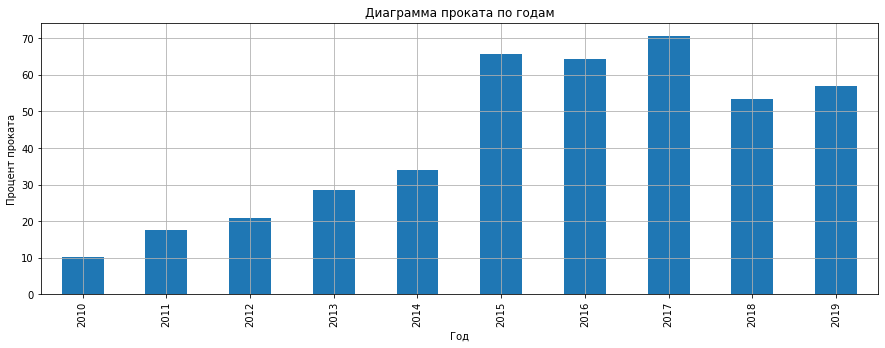

In [73]:
data_pivot.plot(kind='bar', y='Процент проката', title= 'Диаграмма проката по годам', figsize=(15, 5), grid=True, legend=False);
plt.ylabel('Процент проката')
plt.xlabel('Год')
plt.show()

По данным сводной таблицы и графика мы можем отметить, что с 2010 по 2019 значительно увеличилось производство в киноиндустрии, количество фильмов, которые выходили в прокат, суммы затрат выросли примерно в пять раз.

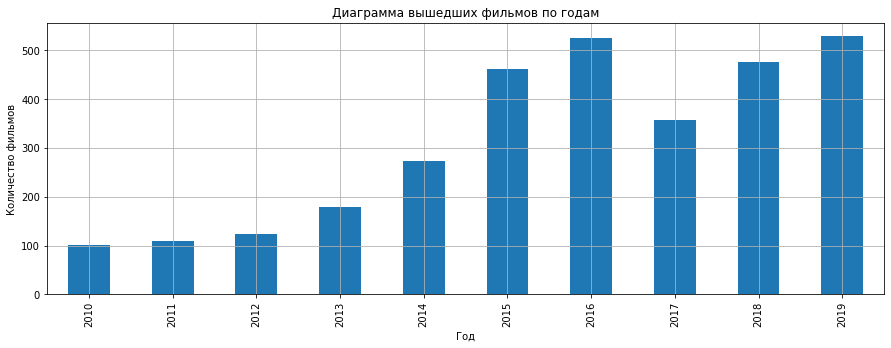

In [74]:
data_pivot.plot(kind='bar', y='Вышло в прокат', title= 'Диаграмма вышедших фильмов по годам', figsize=(15, 5), grid=True, legend=False);
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

Начиная с 2010 заметен рост количества фильмов, которым выдавались прокатные удостоверения в целом, в 2017 был резкий спад, а к 2019 значения вернулись в норму 2016 года.

**Посмотрим на динамику проката по годам и на изменение суммы сборов в разрезе каждого отдельного года.**

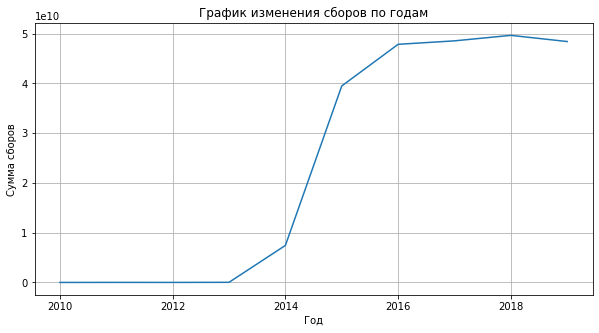

In [75]:
data_pivot.plot(kind='line', y='Сумма', title= 'График изменения сборов по годам', figsize=(10, 5), legend=False, grid=True)
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

Судя по графику, минимальные сборы были в 2010 году, а максимальные в 2018. Подтвердим расчетами:

In [76]:
print('Минимум сборов в', data_pivot['Сумма'].idxmin())
print('Максимум сборов в', data_pivot['Сумма'].idxmax())

Минимум сборов в 2010
Максимум сборов в 2018


С увеличением кинопроизводства выросли и суммы сборов.

**Посмотрим на среднее и медианное значение суммы сборов в рублях по каждому году отдельно, визуализируем.**

In [77]:
display(data_pivot.loc[:, ['Среднее', 'Медиана']])

,Среднее,Медиана
show_start_year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


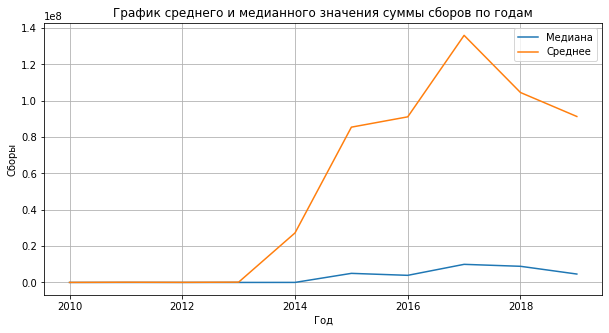

In [78]:
data_pivot.plot(kind='line', y=['Медиана', 'Среднее'], title= 'График среднего и медианного значения суммы сборов по годам', figsize=(10, 5), legend=True, grid=True)
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.show()

Из графика мы видим, что динамика сохраняется: с 2010 по 2019 суммы за сборы естественно увеличивались. Несмотря на изменение среднего за эти годы, медианное значение так и осталось не очень большим. 

На графике мы видим существенное изменение среднего по годам, в отличие от медианы. Среднее значение является чувствительной статистической мерой, на нее сильно влияют крайние значения. С 2010 до 2013 года среднее и медиана совпадали - это значит, что распределение было симметрично. С 2013 года среднее значение выросло, это означает, что появились отдельные фильмы, сборы за которые на порядок превышают другие.

**Изучим влияние возрастного ограничения на сборы**

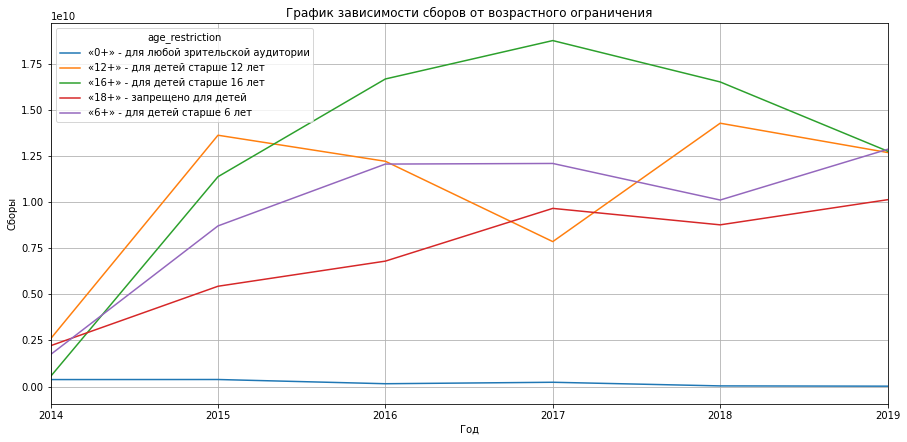

In [79]:
data_age = data.query('box_office > 0').pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')

(data_age.plot(kind='line', xlim=[2014, 2019], figsize=(15, 7), title= 'График зависимости сборов от возрастного ограничения', legend=True, grid=True))
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.show()

Посмотрим на суммарные данные по категориям и подведем итог в строке total

In [80]:
sum = data_age.sum(axis=0)
data_age = data_age.append(pd.Series(sum, name='total'))
data_age

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2010,1887611.00,120146.00,366512.00,54385.00,NaN
2011,13499871.00,219891.00,381513.00,1040.00,450.00
2012,2266483.00,108734.00,3254216.00,182580.00,1143410.00
2013,2710302.50,20910336.50,658069.60,5161245.60,359752.00
2014,375562258.20,2584782324.00,544280086.70,2209712746.90,1730614443.40
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41


Выведем минимальную и максимальную сумму по категориям

In [81]:
print('Минимум: {} руб.' .format(round(sum.min(), 2)))
print('Максимум: {} руб.' .format(round(sum.max(), 2)))

Минимум: 1205003951.67 руб.
Максимум: 76583674040.93 руб.


Из расчета и таблицы мы видим, что в прокате фильмы с возрастным ограничением '«0+» - для любой зрительской аудитории' набрали меньше всего средств, а больше всего средств собрали фильмы с возрастным ограничением '«16+» — для детей старше 16 лет'.

На графике зависимости сборов от возрастного ограничения видно, что фильмы категории «16+» три года подряд (2016, 2017 и 2018) лидировали по сборам, в то время как в других категориях был спад или не очень существенные изменения, и только в 2019 году первое место по сборам заняли фильмы категории «6+» и то с почти незаметным отрывом.

Это может быть связано с тем, что фильмы категории «16+» после своего пика в 2017 году по какой-то причине начали терять аудиторию. Предположим: это могло быть из-за перенасыщения рынка или из-за того, что популярность начали набирать фильмы категории «12+» (так называемые "семейные"), что в итоге и привело к спаду в категории фильмов «16+».

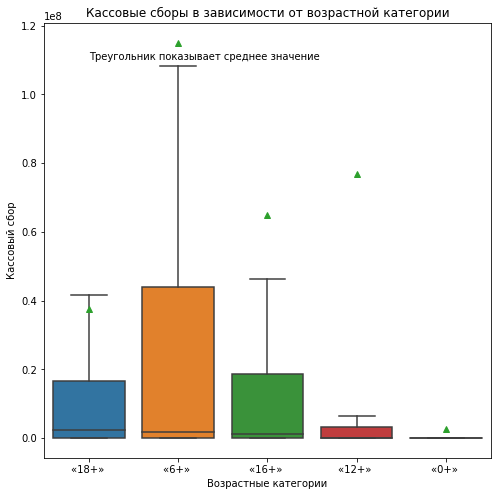

In [101]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['show_start_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 1.1e8,'Треугольник показывает среднее значение')
plt.show()

**Вывод**\
На данном этапе мы обратили внимание на такие данные как: сколько фильмов выходило в прокат каждый год, как менялась динамика проката по годам, определили влияние возрастного ограничения аудитории на сборы.

По исходным данным, проведенному анализу и полученным результатам можно сделать вывод, что кинопроизводство за период с 2010 по 2019 годы росло и развивалось, увеличивалось производство фильмов, суммы затрат выросли примерно в пять раз. Минимальные сборы были в 2010 году, а максимальные в 2018. 

Тем не менее, в 2017 году наблюдался резкий спад количества фильмов, получивших прокатные удостоверения, после чего, с 2018 года снова начался подъем и к 2019 году значения вернулись в норму 2016 года.

По сборам лидерами являлись фильмы категории «16+», но после 2017 года они начали терять аудиторию, возможно из-за перенасыщения рынка и конкуренции со стороны фильмов категории «12+». В 2019 году первое место по сборам заняли фильмы категории «6+», это может говорить о том, что вкусы и предпочтения зрителей меняются со временем. Увеличение интереса к фильмам категории «6+» может быть связано с тенденцией к семейным ценностям, например, родители стали больше внимания уделять своим детям. Кроме того, существенное влияние на выбор зрителей может оказывать качество фильмов и их сценарий, а также качество продвижения и рекламы.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Исследуем фильмы с господдержкой через параметр сборов: сколько собрано в целом, по фильмам, по жанрам; а также проверим рейтинги.

In [82]:
data['box_office'].describe()

count         7485.00
mean      32267163.99
std      160611080.38
min              0.00
25%              0.00
50%              0.00
75%        1081445.00
max     3073568690.79
Name: box_office, dtype: float64

Исключим отсутствующие данные и построим гистограмму для наглядности

Text(0.5, 0, 'Сумма сборов')

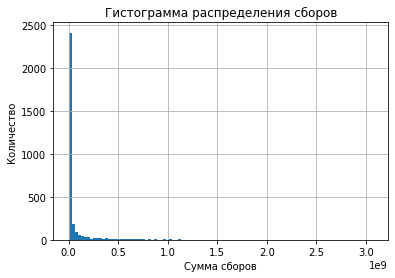

In [83]:
data.query('box_office > 0')['box_office'].hist(bins=100)

plt.title('Гистограмма распределения сборов')
plt.ylabel('Количество')
plt.xlabel('Сумма сборов')

Судя по графику, сборов в крупных суммах было очень немного. Преобладают сборы до 500 тыс. руб., но большая часть сборов все равно довольно мала.

Посмотрим на количество снятых с господдержкой фильмов, отдельно для тех, у которых есть сборы, и отдельно без сборов.

In [84]:
list = ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
print('Без информации о сборах:', data.query('budget != 0 and box_office == 0  and financing_source in @list' )['title'].count())
print('С информацией о сборах:', data.query('budget != 0 and box_office != 0 and financing_source in @list' )['title'].count())

Без информации о сборах: 14
С информацией о сборах: 318


Ранее, на этапе предобработки данных мы пришли к выводу, что на момент формирования данных некоторые фильмы только вышли в прокат и пока не имели информации о сборах. Последняя дата, которая зафиксирована в данных, это 30 декабря 2019 года. Допустим, что за два месяца и более после даты старта фильма, данные о сборах уже есть, так что исключим фильмы, которые были запущены в прокат после 30 октября 2019 года.

In [85]:
data.query('budget != 0 and box_office == 0 and financing_source in @list and show_start_date < "2019-10-30 12:00:00+00:00" ' )

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,support_percent
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,25000000.00,41998984.00,Министерство культуры,6.30,драма,0.00,2015,А.Галибин,драма,59.53
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,10000000.00,61000000.00,Министерство культуры,5.20,мелодрама,0.00,2017,А.Сурикова,мелодрама,16.39
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,11520000.00,18706080.00,Министерство культуры,7.00,"мультфильм,приключения,детектив",0.00,2016,А.Романец,мультфильм,61.58
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,25000000.00,44600000.00,Министерство культуры,7.20,"детский,комедия",0.00,2017,Е.Соколов,детский,56.05
6475,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,25000000.00,39700000.00,Министерство культуры,5.20,"драма,криминал",0.00,2019,С.Черников,драма,62.97
6708,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,Продюсер не определен,«12+» - для детей старше 12 лет,0.00,30000000.00,46941140.00,Министерство культуры,6.10,"драма,военный,история",0.00,2019,А.Золотухин,драма,63.91
6967,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,40000000.00,61571449.00,Министерство культуры,5.80,"драма,история,биография",0.00,2019,Ю.Разыков,драма,64.97
7008,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,25000000.00,60668576.00,Министерство культуры,4.90,"драма,криминал,детектив",0.00,2019,П.Левченко,драма,41.21


Получившийся датафрейм включает в себя разные годы, и тенденции в пропусках данных о сборах не наблюдается. У этих фильмов есть рейтинг, значит они точно выходили в прокат. Скорее всего данные просто пропущены по какой-то причине: были утеряны, либо не выгрузились.

Посчитаем медианную сумму по выделенному бюджету

In [86]:
data.query('budget != 0')['budget'].median()

74592550.0

Посчитаем количество фильмов, которые ниже этой границы по сборам

In [87]:
data.query('budget != 0 and box_office < 74592550 and financing_source in @list')['box_office'].sort_values(ascending=True).nunique()

221

Это число составляет 69.5% от общей информации о сборах, которая у нас есть. Полагаем, что доходы у выпускаемых фильмов с господдержкой были очень скромные.

Распределим фильмы по категориям и вычислим процент от общего количества данных, а затем посмотрим на доходы в разрезе по типам фильмов.

Поделим сборы на пять категорий с шагом в 20%:
- **провальный** 0 - 20%
- **убыточный** 21 - 40%
- **средний** 41 - 60%
- **успешный** 61 - 80%
- **кассовый** 81 - 100%

In [88]:
data.query('budget != 0 and box_office != 0 and financing_source in @list')['box_office'].quantile([.20, .40, .60, .80])

0.20      725984.10
0.40     5789606.54
0.60    37480267.37
0.80   150860738.64
Name: box_office, dtype: float64

In [89]:
#добавим в таблицу столбец с категориями

bins = [0, 725984.10, 5789606.54, 37480267.37, 150860738.64, float('inf')]
labels = ['провальный', 'убыточный', 'средний', 'успешный', 'кассовый']
data['category'] = pd.cut(data['box_office'], bins=bins, labels=labels)

In [90]:
#посмотрим на процент по каждой категории

to_sort(data, 'category', 'box_office')

,Количество в box_office,Процент от общего
category,,
провальный,1131,36.09
убыточный,785,25.05
средний,544,17.36
кассовый,355,11.33
успешный,319,10.18


Доля провальных и убыточных фильмов велика, суммарно это примерно 61% от всего количества данных о сборах.

Посмотрим на расходы по жанрам в виде сводной таблицы и выясним какие жанры были убыточны, а какие наоборот окупали себя.

In [91]:
data_budget_box_office = (data.query('budget != 0 and box_office != 0 and ratings !=0 and financing_source in @list')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office', 'budget'], aggfunc= 'mean')
                    .sort_values(by='ratings', ascending = False))
data_budget_box_office

,box_office,budget,ratings
main_genres,,,
криминал,79931287.67,142198260.33,7.50
детский,1004550.67,46432668.00,7.10
спорт,989256129.15,236822988.33,6.93
биография,172294345.88,176311212.33,6.90
детектив,27709502.28,239644459.40,6.76
боевик,99321489.08,122430724.83,6.58
мюзикл,25426251.24,141049368.00,6.55
драма,109090162.08,125032222.51,6.47
военный,113074496.87,142878536.11,6.47


In [92]:
#приводим таблицу к удобному виду, считаем процент окупаемости

data_budget_box_office = data_budget_box_office.reindex(['ratings', 'box_office', 'budget'], axis=1)
data_budget_box_office['percent_box'] = round((data_budget_box_office['box_office'] / data_budget_box_office['budget']), 2)
data_budget_box_office = data_budget_box_office.set_axis(['Рейтинг', 'Сборы', 'Бюджет', 'Окупаемость'], axis='columns')

In [93]:
data_budget_box_office.sort_values(by= 'Окупаемость', ascending=False)

,Рейтинг,Сборы,Бюджет,Окупаемость
main_genres,,,,
спорт,6.93,989256129.15,236822988.33,4.18
комедия,5.53,170958595.26,84255962.73,2.03
ужасы,5.20,71012318.93,56387762.50,1.26
фантастика,6.19,171820427.94,165893688.06,1.04
биография,6.90,172294345.88,176311212.33,0.98
семейный,4.98,97404124.94,100633297.83,0.97
мультфильм,5.76,187400471.16,204521528.20,0.92
драма,6.47,109090162.08,125032222.51,0.87
боевик,6.58,99321489.08,122430724.83,0.81


По полученным данным делаем вывод, что успешнее всего фильмы в жанре 'спорт' (сборы превысили бюджет в 4 раза) и 'комедия' (сборы превысили бюджет в 2 раза). Хуже всего дело обстоит с мюзиклами, детективами, мелодрамами и фильмами для детей.

**Сравним рейтинги фильмов с господдержкой и без**

In [94]:
raitings_without_gs = (data.query('financing_source not in @list')
                    .pivot_table(index='main_genres', values=['ratings'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
raitings_without_gs = raitings_without_gs.set_axis(['Рейтинг фильмов без господдержки'], axis='columns')

raitings_gs = (data.query('budget != 0 and box_office != 0 and financing_source in @list')
                    .pivot_table(index='main_genres', values=['ratings'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
raitings_gs = raitings_gs.set_axis(['Рейтинг фильмов с господдержкой'], axis='columns')

raitings_merge = raitings_without_gs.merge(raitings_gs, on='main_genres', how='right')
raitings_merge.sort_values(by= 'Рейтинг фильмов с господдержкой', ascending=False)

,Рейтинг фильмов без господдержки,Рейтинг фильмов с господдержкой
main_genres,,
криминал,6.63,7.50
детский,5.95,7.10
спорт,7.25,6.93
биография,7.02,6.90
детектив,6.64,6.76
боевик,6.51,6.58
мюзикл,6.93,6.55
драма,6.79,6.47
военный,6.79,6.47


Визуализируем полученные данные

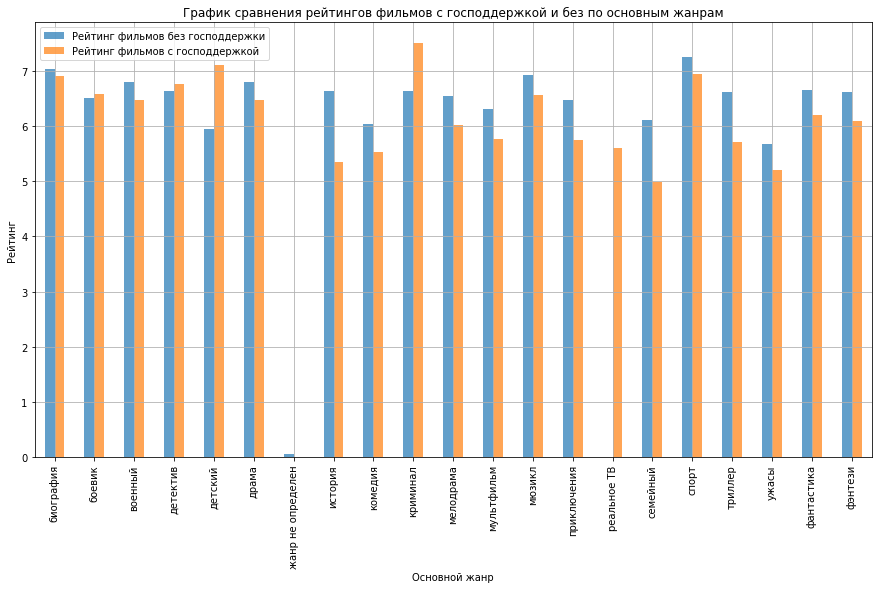

In [95]:
raitings_merge.plot(kind='bar', figsize=(15, 8), grid=True, title= 'График сравнения рейтингов фильмов с господдержкой и без по основным жанрам', legend=True, alpha=0.7)
plt.ylabel('Рейтинг')
plt.xlabel('Основной жанр')
plt.show()

Таким образом, среди фильмов, снятых с государственной поддержкой, можно выделить несколько жанров, у которых рейтинг выше, чем у коммерческих российских или зарубежных фильмов:
- криминал — 7.50 против 6.63
- детские — 7.10 против 5.95
- детективы — 6.76 против 6.64
- боевики — 6.58 против 6.51

### Шаг 5. Общий вывод

Целью данного исследования являлось изучение рынка российского кинопроката и выявление текущих трендов.

Первым этапом была выполнена работа по ознакомлению с данными и их предобработке. 
Мы работали с набором данных, опубликованным на портале открытых данных Министерства культуры и содержащих информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Были проведены расчеты и в таблицу добавлены новые столбцы:
- с информацией о годе проката ('show_start_year'),
- с именем и фамилией главного режиссёра ('main_director'),
- с основным жанром фильма ('main_genres'),
- с определением доли господдержки в общем бюджете фильма ('support_percent')

Следующим этапом нами был проведен исследовательский анализ данных.

По итогам исследования мы увидели, что с 2010 по 2019 годы кинопроизводство демонстрирует значительный рост в количестве выходящих фильмов, а также в затратах на их производство. В частности, количество фильмов, которые выходили в прокат, увеличилось примерно в 5 раз: от 101 фильма в 2010 году до 530 фильмов в 2019 году.
Тем не менее, в 2017 году наблюдался резкий спад количества фильмов, получивших прокатные удостоверения, после чего, с 2018 года снова начался подъем и к 2019 году значения вернулись в норму 2016 года.

Что касается суммы сборов, минимальной она была в 2010 году - 2428654 рублей, а максимальной в 2018 году - 49668403134 рублей.

Изучая влияние возрастного ограничения аудитории на сборы мы пришли к выводу, что в течение трех лет подряд c 2016 по 2018 фильмы категории «16+» были лидерами по сборам в кинотеатрах, тогда как другие категории испытывали спад или не очень заметные изменения. Однако в 2019 году первое место по сборам заняли фильмы категории «6+» с небольшим отрывом. Кроме того, начиная с 2017 года, популярность набирают фильмы категории «12+», которые частично делят сегмент аудитории с фильмами категории «16+». 

Далее мы перешли к исследованию непосредственно фильмов, которые получили государственную поддержку.
Мы изучали их через параметр сборов: сколько собрано в целом, по фильмам, по жанрам; а также проверили рейтинги.

Так, данные показали, что фильмы, снятые при государственной поддержке, не всегда показывают высокие результаты. Рейтинги таких фильмов по большинству жанров ниже, чем у коммерческих российских и зарубежных фильмов. Из всего спектра жанров, фильмы-боевики, детективы, детские фильмы и криминальные фильмы с государственной поддержкой оказались более высоко оцененными по сравнению с аналогичными жанрами коммерческих российских и зарубежных фильмов. Однако количество жанров с преобладающим рейтингом все еще невысоко, только 4 из 19 возможных.

По сборам и окупаемости фильмов с господдержкой мы делаем вывод, что доля провальных и убыточных фильмов велика, суммарно это примерно 61% от всего количества данных о сборах. Успешнее всего фильмы в жанре 'спорт' (сборы превысили бюджет в 4 раза) и 'комедия' (сборы превысили бюджет в 2 раза). Хуже всего дело обстоит с мюзиклами, детективами, мелодрамами и фильмами для детей: их окупаемость составляет менее 20%.